# The analysis for the presentation for the 05/03/2024

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import seaborn as sns


In [3]:
def path_translator(experiement_name):

    result_folder = Path("../../Simulation_results/")
    file_name = "analyzed_" + experiement_name + ".csv"
    results_path = result_folder / experiement_name / file_name

    return results_path

In [38]:
experiment_name = "Exponential_weight"
file_path = path_translator(experiment_name)
data = pd.read_csv(file_path)
data = data[data["n_patients"] >= 500]
data.columns

Index(['Unnamed: 0', 'weight_function', 'n_patients', 'n_bootstraps', 'cutoff',
       'HR_target', 'HR_calculated_GPU_bootstraps',
       'HR_calculated_GPU_bootstraps_2_5', 'HR_calculated_GPU_bootstraps_97_5',
       'BIC_results', 'nknots'],
      dtype='object')

In [14]:
experiment_name = "Exponential_weight"
file_path = path_translator(experiment_name)
data = pd.read_csv(file_path)
data = data[data["n_patients"] >= 500]

print(len(data))

data_min_bic = data.loc[data.groupby(['n_patients', 'HR_target'])['BIC_results'].idxmin()]




# experiment_name = "HR : 2, patients : 100 - 100 000"
# file_path = path_translator(experiment_name)
# print(file_path)
# data2 = pd.read_csv(file_path)
# data = pd.concat([data1,data2])
# data


FileNotFoundError: [Errno 2] No such file or directory: '../Simulation_results/Exponential_weight/analyzed_Exponential_weight.csv'

In [58]:
HR_target = 2
n_patients = 100000
test_df = data_min_bic[data_min_bic["n_patients"] == n_patients ]
test_df = test_df[test_df["HR_target"] == HR_target ]
test_df

,Unnamed: 0,weight_function,n_patients,n_bootstraps,cutoff,HR_target,HR_calculated_GPU_bootstraps,HR_calculated_GPU_bootstraps_2_5,HR_calculated_GPU_bootstraps_97_5,BIC_results,nknots
78,79,exponential_weight,100000,1000,180,2.0,2.036962,1.960074,2.11594,1.566052e+06,2


In [59]:
comparison_df = data[data["n_patients"] == n_patients ]
comparison_df = comparison_df[comparison_df["HR_target"] == HR_target ]
comparison_df

,Unnamed: 0,weight_function,n_patients,n_bootstraps,cutoff,HR_target,HR_calculated_GPU_bootstraps,HR_calculated_GPU_bootstraps_2_5,HR_calculated_GPU_bootstraps_97_5,BIC_results,nknots
38,39,exponential_weight,100000,1000,180,2.0,2.005854,1.944622,2.075364,1.566679e+06,1
78,79,exponential_weight,100000,1000,180,2.0,2.036962,1.960074,2.115940,1.566052e+06,2
118,119,exponential_weight,100000,1000,180,2.0,2.065062,1.987129,2.155217,1.566352e+06,3


In [25]:
experiment_name = "Null_weight"
file_path = path_translator(experiment_name)
data_null = pd.read_csv(file_path)
data_null = data_null[data_null["nknots"] ==1]

In [21]:
def plot_HR(ax,data,HR_target):
    sub_data = data[data["HR_target"]==HR_target]
    # sub_data = sub_data[sub_data["n_patients"] > 100]
    n_patients = list(sub_data["n_patients"].unique())
    means = sub_data["HR_calculated_GPU_bootstraps"]
    lowers = list(sub_data["HR_calculated_GPU_bootstraps_2_5"])
    highers = list(sub_data["HR_calculated_GPU_bootstraps_97_5"])

    print(n_patients)

    minlower = min(lowers)
    maxhigher = max(highers)

    errors =  [means - lowers, highers - means]
    ax.errorbar(n_patients, means, yerr=errors, fmt='o', capsize=5, color ="black",label = "Calculated result")


    return ax, minlower, maxhigher



In [61]:
def plot_HR_simple(data,HR_target):
    sub_data = data[data["HR_target"]==HR_target]
    sub_data = sub_data[sub_data["n_patients"] > 100]
    n_patients = list(sub_data["n_patients"].unique())
    means = sub_data["HR_calculated_GPU_bootstraps"]
    lowers = list(sub_data["HR_calculated_GPU_bootstraps_2_5"])
    highers = list(sub_data["HR_calculated_GPU_bootstraps_97_5"])


    errors =  [means - lowers, highers - means]


    plt.errorbar(n_patients, means, yerr=errors, fmt='o', capsize=5, color ="black",label = "Calculated result")

    plt.axhline(y=HR_target, color='grey', linestyle='dashed', label = 'HR target')
    plt.ylabel("HR")
    plt.xlabel("Number of patients")
    plt.legend()
    plt.xscale('log')



In [31]:
experiment_name = "Exponential_weight"
file_path = path_translator(experiment_name)
data = pd.read_csv(file_path)
data = data[data["n_patients"] >= 500]

print(len(data))

data_min_bic = data.loc[data.groupby(['n_patients', 'HR_target'])['BIC_results'].idxmin()]

experiment_name = "Null_weight"
file_path = path_translator(experiment_name)
data_null = pd.read_csv(file_path)
data_null_min_bic = data_null.loc[data_null.groupby(['n_patients', 'HR_target'])['BIC_results'].idxmin()]



96


[100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
[500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
[500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
[500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
[500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]


Text(0.5, 1.0, 'Target HR: 2.8')

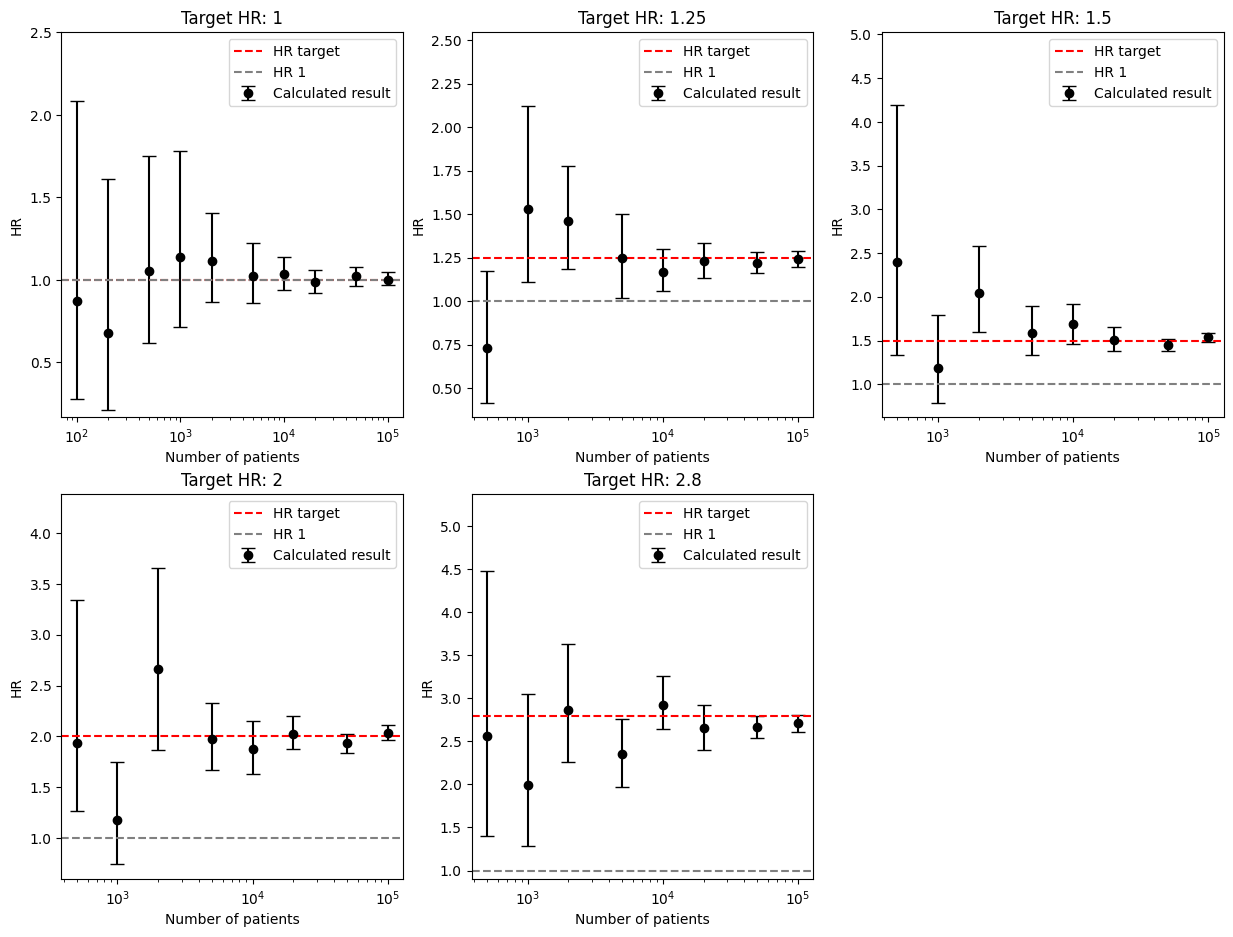

In [32]:

plt.figure(figsize=(15, 11))

##############""
HR_target = 1
ax = plt.subplot(2, 3, 1) 
ax, min_lower, max_higher = plot_HR(ax,data_null_min_bic,HR_target)

plt.axhline(y=HR_target, color='red', linestyle='dashed', label = 'HR target')
plt.axhline(y=1, color='grey', linestyle='dashed', label = 'HR 1')
plt.ylim(min(0.9,min_lower * 0.8),max_higher * 1.2)

plt.ylabel("HR")
plt.xlabel("Number of patients")
plt.legend()
plt.xscale('log')
plt.title(f"Target HR: {HR_target}")



HR_target = 1.25
ax = plt.subplot(2,3, 2) 
ax, min_lower, max_higher = plot_HR(ax,data_min_bic,HR_target)

plt.axhline(y=HR_target, color='red', linestyle='dashed', label = 'HR target')
plt.axhline(y=1, color='grey', linestyle='dashed', label = 'HR 1')
plt.ylim(min(0.9,min_lower * 0.8),max_higher * 1.2)
plt.ylabel("HR")
plt.xlabel("Number of patients")
plt.legend()
plt.xscale('log')
plt.title(f"Target HR: {HR_target}")


##############
HR_target = 1.5
ax = plt.subplot(2, 3, 3) 
ax, min_lower, max_higher = plot_HR(ax,data_min_bic,HR_target)

plt.axhline(y=HR_target, color='red', linestyle='dashed', label = 'HR target')
plt.axhline(y=1, color='grey', linestyle='dashed', label = 'HR 1')
plt.ylim(min(0.9,min_lower * 0.8),max_higher * 1.2)



plt.ylabel("HR")
plt.xlabel("Number of patients")
plt.legend()
plt.xscale('log')
plt.title(f"Target HR: {HR_target}")


###########
HR_target = 2
ax = plt.subplot(2, 3, 4) 
ax, min_lower, max_higher = plot_HR(ax,data_min_bic,HR_target)


plt.axhline(y=HR_target, color='red', linestyle='dashed', label = 'HR target')
plt.axhline(y=1, color='grey', linestyle='dashed', label = 'HR 1')
plt.ylim(min(0.9,min_lower * 0.8),max_higher * 1.2)

plt.ylabel("HR")
plt.xlabel("Number of patients")
plt.legend()
plt.xscale('log')
plt.title(f"Target HR: {HR_target}")


##############""
HR_target = 2.8
ax = plt.subplot(2, 3, 5) 
ax, min_lower, max_higher = plot_HR(ax,data_min_bic,HR_target)



plt.axhline(y=HR_target, color='red', linestyle='dashed', label = 'HR target')
plt.axhline(y=1, color='grey', linestyle='dashed', label = 'HR 1')
plt.ylim(min(0.9,min_lower * 0.8),max_higher * 1.2)

plt.ylabel("HR")
plt.xlabel("Number of patients")
plt.legend()
plt.xscale('log')
plt.title(f"Target HR: {HR_target}")







In [33]:
experiment_name = "Exponential_weight"
file_path = path_translator(experiment_name)
data = pd.read_csv(file_path)
data = data[data["n_patients"] >= 200]


data_min_bic = data.loc[data.groupby(['n_patients', 'HR_target'])['BIC_results'].idxmin()]



experiment_name = "Null_weight"
file_path = path_translator(experiment_name)
data_null = pd.read_csv(file_path)
# data_null = data_null[data_null["n_patients"] >= 500]
data_null_min_bic = data_null.loc[data_null.groupby(['n_patients', 'HR_target'])['BIC_results'].idxmin()]




[100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
[200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
[200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
[200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
[200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]


Text(0.5, 1.0, 'Target HR: 2.8')

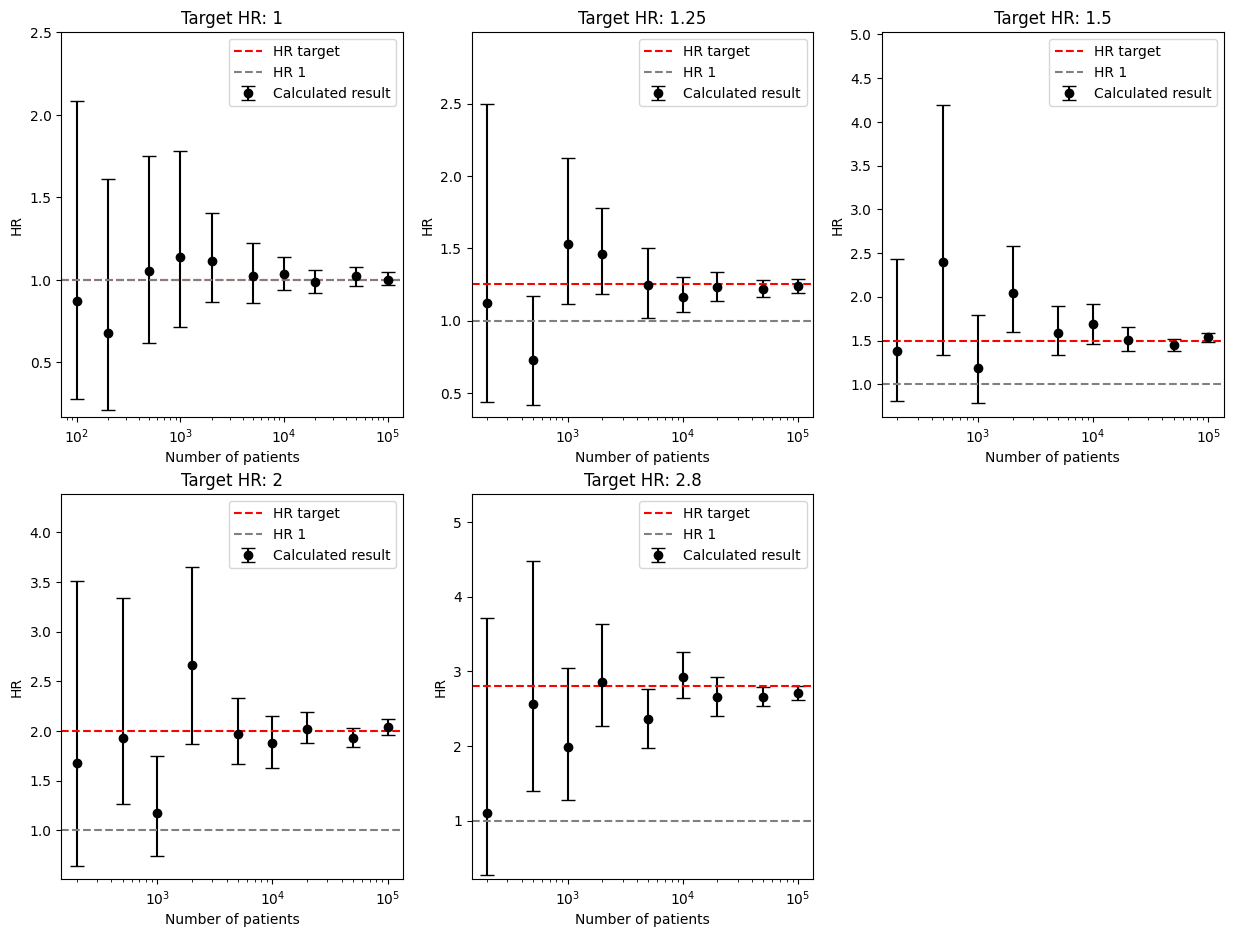

In [34]:
plt.figure(figsize=(15, 11))

##############""
HR_target = 1
ax = plt.subplot(2, 3, 1) 
ax, min_lower, max_higher = plot_HR(ax,data_null_min_bic,HR_target)

plt.axhline(y=HR_target, color='red', linestyle='dashed', label = 'HR target')
plt.axhline(y=1, color='grey', linestyle='dashed', label = 'HR 1')
plt.ylim(min(0.9,min_lower * 0.8),max_higher * 1.2)

plt.ylabel("HR")
plt.xlabel("Number of patients")
plt.legend()
plt.xscale('log')
plt.title(f"Target HR: {HR_target}")



HR_target = 1.25
ax = plt.subplot(2,3, 2) 
ax, min_lower, max_higher = plot_HR(ax,data_min_bic,HR_target)

plt.axhline(y=HR_target, color='red', linestyle='dashed', label = 'HR target')
plt.axhline(y=1, color='grey', linestyle='dashed', label = 'HR 1')
plt.ylim(min(0.9,min_lower * 0.8),max_higher * 1.2)
plt.ylabel("HR")
plt.xlabel("Number of patients")
plt.legend()
plt.xscale('log')
plt.title(f"Target HR: {HR_target}")


##############
HR_target = 1.5
ax = plt.subplot(2, 3, 3) 
ax, min_lower, max_higher = plot_HR(ax,data_min_bic,HR_target)

plt.axhline(y=HR_target, color='red', linestyle='dashed', label = 'HR target')
plt.axhline(y=1, color='grey', linestyle='dashed', label = 'HR 1')
plt.ylim(min(0.9,min_lower * 0.8),max_higher * 1.2)



plt.ylabel("HR")
plt.xlabel("Number of patients")
plt.legend()
plt.xscale('log')
plt.title(f"Target HR: {HR_target}")


###########
HR_target = 2
ax = plt.subplot(2, 3, 4) 
ax, min_lower, max_higher = plot_HR(ax,data_min_bic,HR_target)


plt.axhline(y=HR_target, color='red', linestyle='dashed', label = 'HR target')
plt.axhline(y=1, color='grey', linestyle='dashed', label = 'HR 1')
plt.ylim(min(0.9,min_lower * 0.8),max_higher * 1.2)

plt.ylabel("HR")
plt.xlabel("Number of patients")
plt.legend()
plt.xscale('log')
plt.title(f"Target HR: {HR_target}")


##############""
HR_target = 2.8
ax = plt.subplot(2, 3, 5) 
ax, min_lower, max_higher = plot_HR(ax,data_min_bic,HR_target)



plt.axhline(y=HR_target, color='red', linestyle='dashed', label = 'HR target')
plt.axhline(y=1, color='grey', linestyle='dashed', label = 'HR 1')
plt.ylim(min(0.9,min_lower * 0.8),max_higher * 1.2)

plt.ylabel("HR")
plt.xlabel("Number of patients")
plt.legend()
plt.xscale('log')
plt.title(f"Target HR: {HR_target}")



In [ ]:
### Working on 

# heatmaps


In [20]:
labels = ["No detected effect", 
          "Don't include the target HR",
          "Good HR detected",
          "Good HR detected with small CI"
          ]



In [26]:
print(data.columns)

Index(['Unnamed: 0', 'weight_function', 'n_patients', 'n_bootstraps', 'cutoff',
       'HR_target', 'HR_calculated_GPU_bootstraps',
       'HR_calculated_GPU_bootstraps_2_5', 'HR_calculated_GPU_bootstraps_97_5',
       'BIC_results', 'nknots', 'label'],
      dtype='object')


In [212]:
import os 


experiment_name = "Exponential_weight"
file_path = path_translator(experiment_name)
data = pd.read_csv(file_path)
data = data[data["n_patients"] >= 100]
data_min_bic = data.loc[data.groupby(['n_patients', 'HR_target'])['BIC_results'].idxmin()]
data = data_min_bic


In [213]:
data["error_ratio"] = (data["HR_calculated_GPU_bootstraps_97_5"] - data["HR_calculated_GPU_bootstraps_2_5"])/data["HR_target"]
data

,Unnamed: 0,weight_function,n_patients,n_bootstraps,cutoff,HR_target,HR_calculated_GPU_bootstraps,HR_calculated_GPU_bootstraps_2_5,HR_calculated_GPU_bootstraps_97_5,BIC_results,nknots,error_ratio
0,1,exponential_weight,100,1000,180,1.25,0.727144,0.137895,2.636639,5.449300e+02,1,1.998996
41,42,exponential_weight,100,1000,180,1.50,0.497299,0.115104,1.622979,5.052326e+02,2,1.005250
2,3,exponential_weight,100,1000,180,2.00,0.694542,0.151425,2.057486,5.454827e+02,1,0.953031
3,4,exponential_weight,100,1000,180,2.80,4.201753,1.228301,20.979157,4.399478e+02,1,7.053877
4,5,exponential_weight,200,1000,180,1.25,1.124230,0.434560,2.494856,1.267778e+03,1,1.648237
5,6,exponential_weight,200,1000,180,1.50,1.382298,0.807151,2.431232,1.283411e+03,1,1.082721
6,7,exponential_weight,200,1000,180,2.00,1.677041,0.635539,3.506827,1.202211e+03,1,1.435644
47,48,exponential_weight,200,1000,180,2.80,1.099924,0.272763,3.710006,1.174017e+03,2,1.227587
8,9,exponential_weight,500,1000,180,1.25,0.729339,0.415764,1.172056,3.914456e+03,1,0.605033
49,50,exponential_weight,500,1000,180,1.50,2.393795,1.332183,4.187815,3.902110e+03,2,1.903755


In [214]:
conditions = [
    data['HR_calculated_GPU_bootstraps_2_5'] <= 1,
    (data["HR_calculated_GPU_bootstraps_2_5"] > 1) 
        & ((data["HR_calculated_GPU_bootstraps_2_5"] > data["HR_target"]) | (data["HR_calculated_GPU_bootstraps_97_5"] < data["HR_target"])),
    (data["HR_calculated_GPU_bootstraps_2_5"] > 1)
        & ((data["HR_calculated_GPU_bootstraps_2_5"] <= data["HR_target"]) & (data["HR_calculated_GPU_bootstraps_97_5"] >= data["HR_target"]))
        & (data["error_ratio"] > 0.25),
    (data["HR_calculated_GPU_bootstraps_2_5"] > 1)
        & ((data["HR_calculated_GPU_bootstraps_2_5"] <= data["HR_target"]) & (data["HR_calculated_GPU_bootstraps_97_5"] >= data["HR_target"]))
        & (data["error_ratio"] <= 0.25),
]


In [238]:
categories = [0,1 ,2 ,3 ]

categories_label = {
    0 : "no detected effect",
    1 : "bad",
    2 : "medium",
    3 : "good"
}

data_categorized = data


data_categorized["heatmap_label"] = np.select(conditions,categories, default ="Unknown")
data_categorized

,Unnamed: 0,weight_function,n_patients,n_bootstraps,cutoff,HR_target,HR_calculated_GPU_bootstraps,HR_calculated_GPU_bootstraps_2_5,HR_calculated_GPU_bootstraps_97_5,BIC_results,nknots,error_ratio,heatmap_label
0,1,exponential_weight,100,1000,180,1.25,0.727144,0.137895,2.636639,5.449300e+02,1,1.998996,0
41,42,exponential_weight,100,1000,180,1.50,0.497299,0.115104,1.622979,5.052326e+02,2,1.005250,0
2,3,exponential_weight,100,1000,180,2.00,0.694542,0.151425,2.057486,5.454827e+02,1,0.953031,0
3,4,exponential_weight,100,1000,180,2.80,4.201753,1.228301,20.979157,4.399478e+02,1,7.053877,2
4,5,exponential_weight,200,1000,180,1.25,1.124230,0.434560,2.494856,1.267778e+03,1,1.648237,0
5,6,exponential_weight,200,1000,180,1.50,1.382298,0.807151,2.431232,1.283411e+03,1,1.082721,0
6,7,exponential_weight,200,1000,180,2.00,1.677041,0.635539,3.506827,1.202211e+03,1,1.435644,0
47,48,exponential_weight,200,1000,180,2.80,1.099924,0.272763,3.710006,1.174017e+03,2,1.227587,0
8,9,exponential_weight,500,1000,180,1.25,0.729339,0.415764,1.172056,3.914456e+03,1,0.605033,0
49,50,exponential_weight,500,1000,180,1.50,2.393795,1.332183,4.187815,3.902110e+03,2,1.903755,2


In [217]:
data.columns

Index(['Unnamed: 0', 'weight_function', 'n_patients', 'n_bootstraps', 'cutoff',
       'HR_target', 'HR_calculated_GPU_bootstraps',
       'HR_calculated_GPU_bootstraps_2_5', 'HR_calculated_GPU_bootstraps_97_5',
       'BIC_results', 'nknots', 'error_ratio', 'heatmap_label'],
      dtype='object')

HR_target
1.25    object
1.50    object
2.00    object
2.80    object
dtype: object
HR_target
1.25    int64
1.50    int64
2.00    int64
2.80    int64
dtype: object


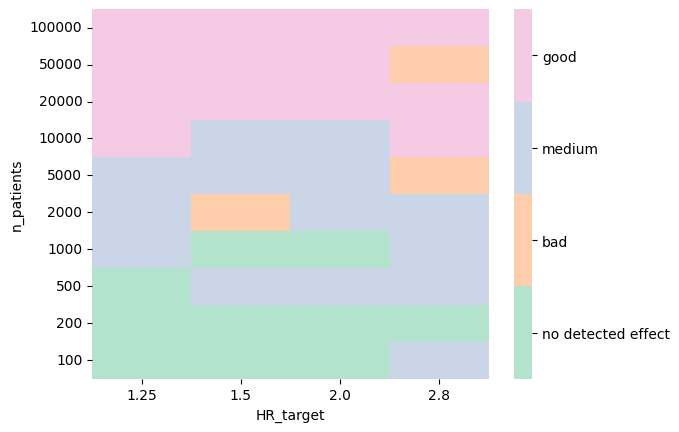

In [272]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches


# create dictionary with value to integer mappings


data_pivot = data_categorized.pivot(values='heatmap_label', index='n_patients', columns='HR_target').sort_index(ascending=False)
print(data_pivot.dtypes)
data_pivot = data_pivot.map(pd.to_numeric)
print(data_pivot.dtypes)
# print(data_pivot)
n = len(categories)    
# discrete colormap (n samples from a given cmap)
cmap = sns.color_palette("Pastel2", n) 
ax = sns.heatmap(data_pivot, cmap = cmap) 

# # modify colorbar:
colorbar = ax.collections[0].colorbar 
r = colorbar.vmax - colorbar.vmin 
colorbar.set_ticks([colorbar.vmin + r / n * (0.5 + i) for i in range(n)])
colorbar.set_ticklabels(list(categories_label[category] for category in categories))                                          
plt.show()


In [253]:
list(categories_label[category] for category in categories)

['no detected effect', 'bad', 'medium', 'good']

In [ ]:
n = len(value_to_int)     
# discrete colormap (n samples from a given cmap)
cmap = sns.color_palette("Pastel2", n) 
ax = sns.heatmap(df.replace(value_to_int), cmap=cmap) 
# modify colorbar:
colorbar = ax.collections[0].colorbar 
r = colorbar.vmax - colorbar.vmin 
colorbar.set_ticks([colorbar.vmin + r / n * (0.5 + i) for i in range(n)])
colorbar.set_ticklabels(list(value_to_int.keys()))                                          
plt.show()

/tmp/ipykernel_5086/246826078.py:6: FutureWarning: The provided callable <function mean at 0x70b56019a710> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table_labels = data.pivot_table(index='n_patients', columns='HR_target', values='label_numeric', aggfunc=np.mean, fill_value=None)


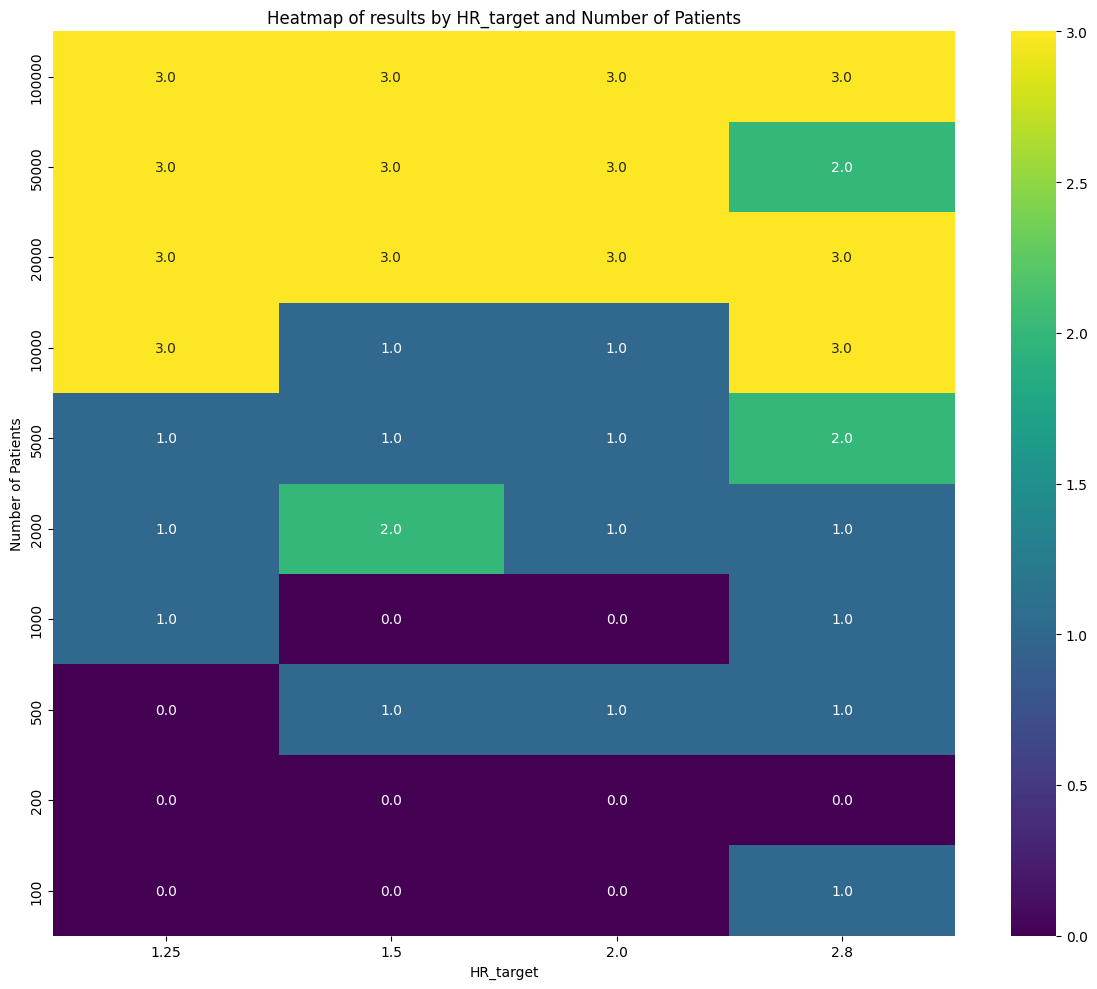

In [111]:
# Mapping categorical "heatmap_label" to numeric values to enable heatmap visualization
label_mapping = {label: idx for idx, label in enumerate(data['heatmap_label'].unique())}
data['label_numeric'] = data['heatmap_label'].map(label_mapping)

# Pivot the table for the heatmap
pivot_table_labels = data.pivot_table(index='n_patients', columns='HR_target', values='label_numeric', aggfunc=np.mean, fill_value=None)

pivot_table_labels_sorted = pivot_table_labels.sort_index(ascending=False)

# Plotting the sorted heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table_labels_sorted, annot=True, cmap="viridis", fmt=".1f")
plt.title('Heatmap of Heatmap Labels by HR_target and Number of Patients')
plt.xlabel('HR_target')
plt.ylabel('Number of Patients')

# Using the same legend as before for interpretation
plt.figtext(1.05, 0.5, "\n".join(legend_labels), ha="center", fontsize=12)

plt.tight_layout()
plt.show()


/tmp/ipykernel_5086/3493558154.py:8: FutureWarning: The provided callable <function mean at 0x70b56019a710> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table_labels = data.pivot_table(index='n_patients', columns='HR_target', values='error_ratio', aggfunc=np.mean, fill_value=None)


Text(120.72222222222221, 0.5, 'Number of Patients')

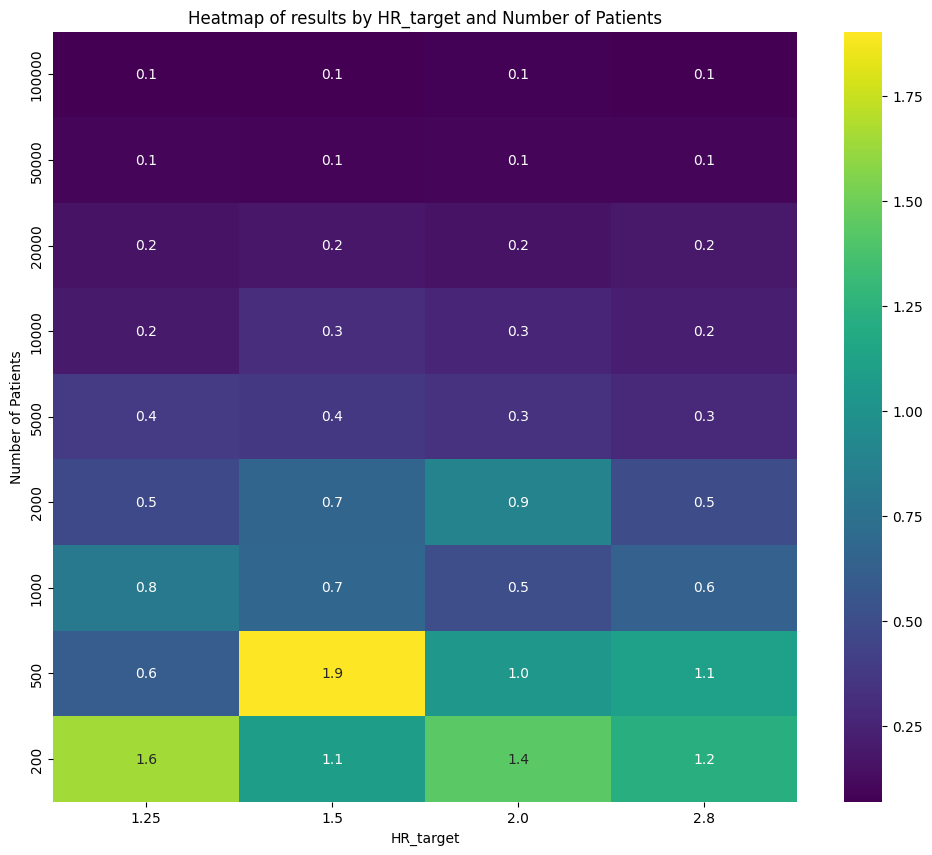

In [114]:
# # Mapping categorical "heatmap_label" to numeric values to enable heatmap visualization
# label_mapping = {label: idx for idx, label in enumerate(data['heatmap_label'].unique())}
# data['label_numeric'] = data['heatmap_label'].map(label_mapping)

data = data[data["n_patients"] > 100]

# Pivot the table for the heatmap
pivot_table_labels = data.pivot_table(index='n_patients', columns='HR_target', values='error_ratio', aggfunc=np.mean, fill_value=None)

pivot_table_labels_sorted = pivot_table_labels.sort_index(ascending=False)

# Plotting the sorted heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table_labels_sorted, annot=True, cmap="viridis", fmt=".1f")
plt.title('Heatmap of results by HR_target and Number of Patients')
plt.xlabel('HR_target')
plt.ylabel('Number of Patients')


ValueError: could not convert string to float: 'exponential_weight'

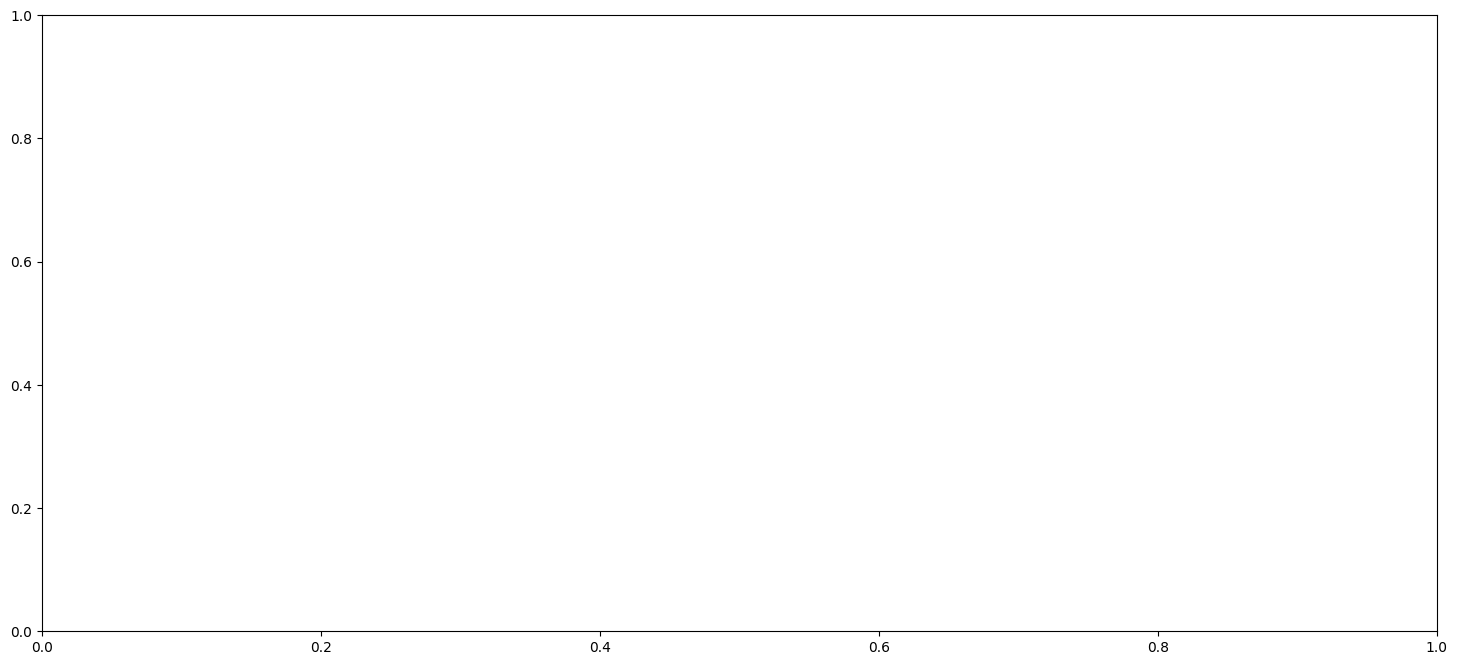

In [115]:
fig,ax = plt.subplots(1,1,figsize=(18,8))
my_colors=[(0.2,0.3,0.3),(0.4,0.5,0.4),(0.1,0.7,0),(0.1,0.7,0)]

sns.heatmap(data, cmap=my_colors, square=True, linewidth=0.1, linecolor=(0.1,0.2,0.2), ax=ax)

colorbar = ax.collections[0].colorbar
M=dt_tweet_cnt.max().max()
colorbar.set_ticks([1/8*M,3/8*M,6/8*M])
colorbar.set_ticklabels(['low','med','high'])

plt.show()